# Lokshabha Election 2024 Result Data Analysis

# Step1:Import libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step2:Import raw input file

In [35]:
df=pd.read_csv(r"C:\Users\Paramita Sen\election_results_2024.csv")

In [36]:
df.head(5)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


# Step3:EDA & Data cleanup

In [37]:
df.shape

(543, 8)

In [38]:
df.isnull().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
dtype: int64

In [39]:
df.dropna(inplace=True)

In [40]:
df.duplicated().sum()

0

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        542 non-null    object
 1   Const. No.          542 non-null    int64 
 2   Leading Candidate   542 non-null    object
 3   Leading Party       542 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              542 non-null    object
 7   Status              542 non-null    object
dtypes: int64(1), object(7)
memory usage: 38.1+ KB


In [42]:
df['Margin']=pd.to_numeric(df['Margin'],errors='coerce')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        542 non-null    object
 1   Const. No.          542 non-null    int64 
 2   Leading Candidate   542 non-null    object
 3   Leading Party       542 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              542 non-null    int64 
 7   Status              542 non-null    object
dtypes: int64(2), object(6)
memory usage: 38.1+ KB


In [44]:
df.describe()

,Const. No.,Margin
count,542.000000,5.420000e+02
mean,18.167897,1.623501e+05
std,16.441108,1.472628e+05
min,1.000000,4.800000e+01
25%,6.000000,5.895675e+04
50%,14.000000,1.222660e+05
75%,25.000000,2.229720e+05
max,80.000000,1.175092e+06


# Step4:Visualisations

In [45]:
#number of seats won by each party 

In [46]:
df.columns

Index(['Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party',
       'Trailing Candidate', 'Trailing Party', 'Margin', 'Status'],
      dtype='object')

In [47]:
#party with highest & least margin of victory

In [48]:
party_votes=df.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

highest_margin=df.loc[df['Margin'].idxmax()]
lowest_margin=df.loc[df['Margin'].idxmin()]


In [49]:
#plot number of seats won by each party

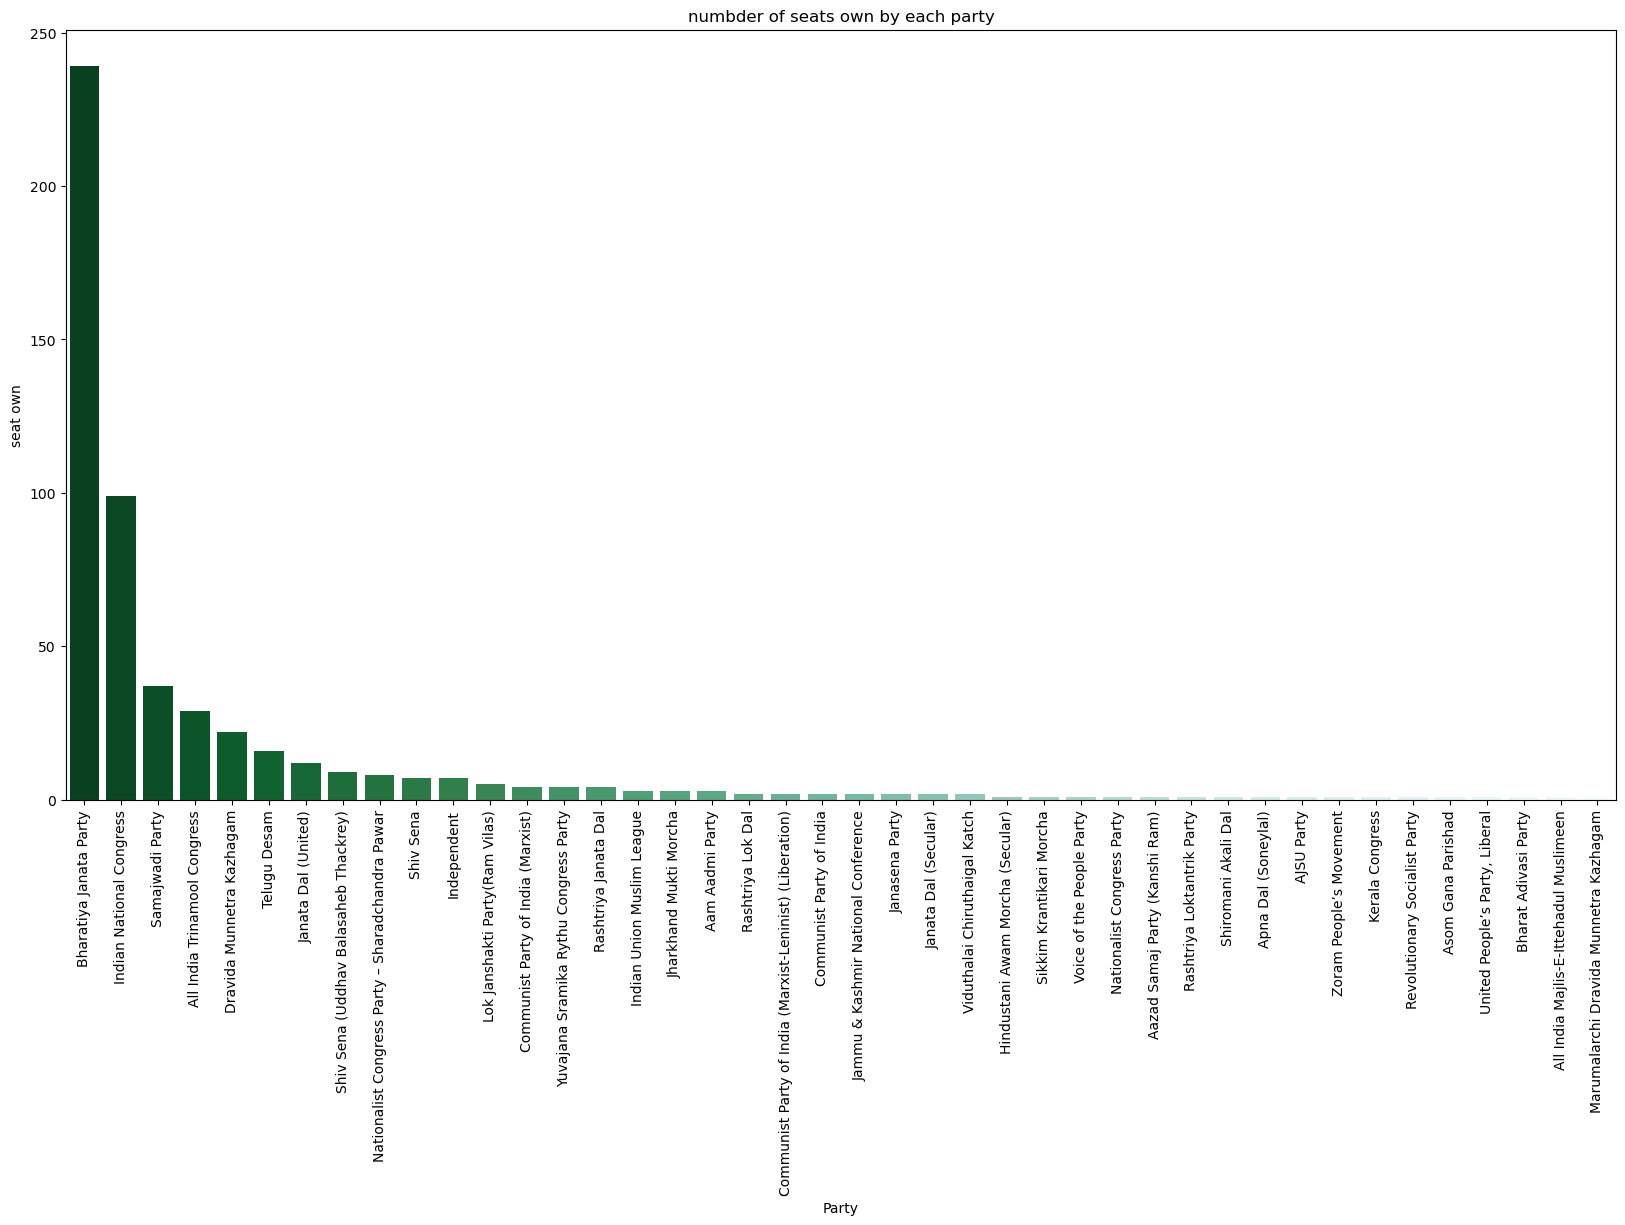

In [50]:
leading_party_highest_votes=party_votes.idxmax()
leading_party_least_votes=party_votes.idxmin()
#number of seats own by each party
seat_own=df['Leading Party'].value_counts()
#plot number of seats own by each party
plt.figure(figsize=(20,10))
sns.barplot(x=seat_own.index,y=seat_own.values,palette='BuGn_r')
plt.title("numbder of seats own by each party")
plt.xlabel("Party")
plt.ylabel("seat own")
plt.xticks(rotation=90)
plt.show()

In [51]:
#conclusion:BJP got max votes

In [52]:
#votes received by r,m,s

In [53]:
r=df[df['Leading Candidate']=='RAHUL GANDHI']
m=df[df['Leading Candidate']=='NARENDRA MODI']
s=df[df['Leading Candidate']=='AMIT SHAH']

r_VOTES=r['Margin'].values
m_VOTES=m['Margin'].values[0] if not m.empty else 0
s_VOTES=s['Margin'].values[0] if not s.empty else 0

r_constituencies=list(r['Constituency'])
m_constituencies=m['Constituency'].values[0] if not m.empty else 'Mo'
s_constituencies=s['Constituency'].values[0] if not s.empty else 'am'

df_to_plot=pd.DataFrame({'Candidate':['Rahul Gandhi']*len(r)+['Narendra Modi','Amit Shah'],
                        'constituency':r_constituencies+[m_constituencies,s_constituencies],
                        'Votes':list(r_VOTES)+[m_VOTES , s_VOTES]})

In [54]:
df.columns

Index(['Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party',
       'Trailing Candidate', 'Trailing Party', 'Margin', 'Status'],
      dtype='object')

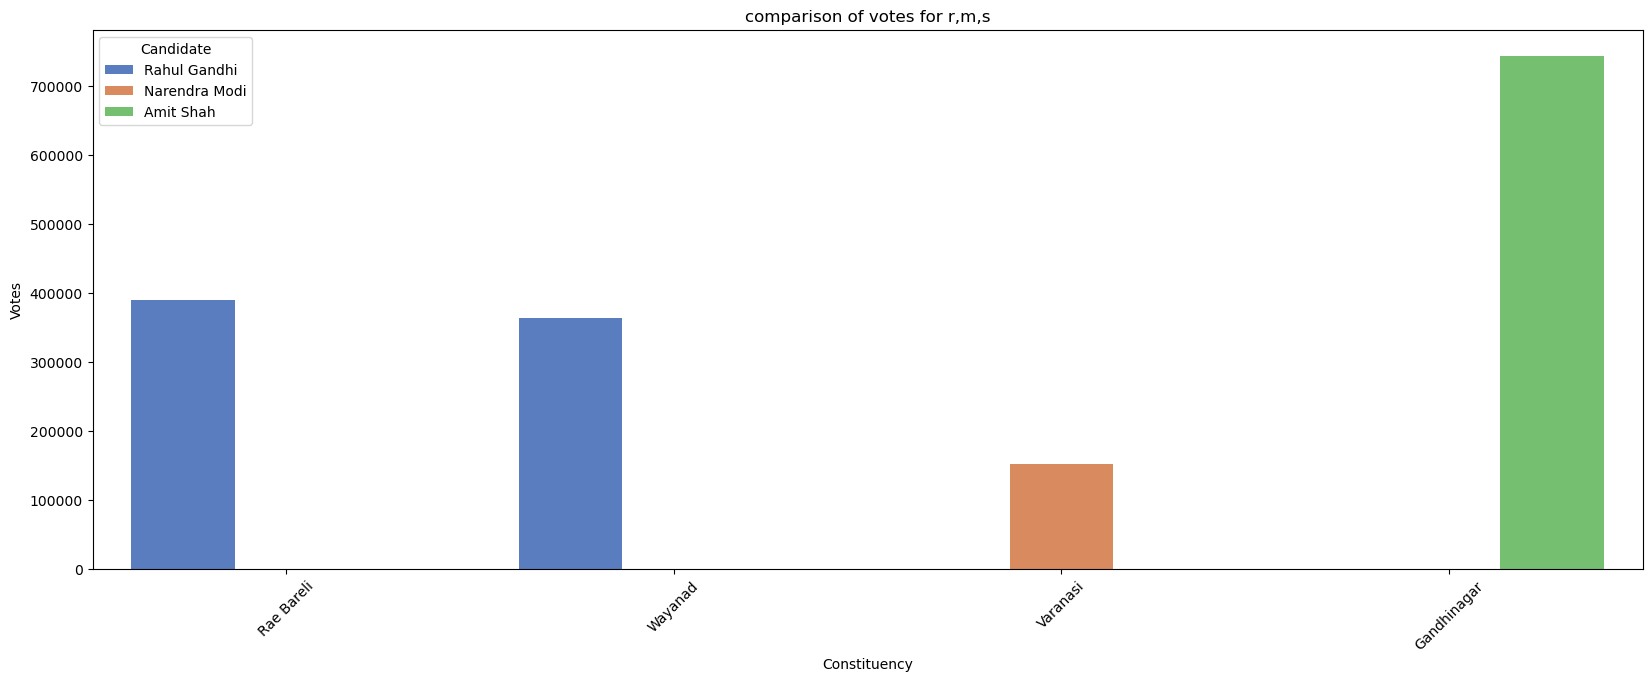

In [55]:
#plot the comparison
plt.figure(figsize=(20,7))
sns.barplot(data=df_to_plot,x='constituency',y='Votes',hue='Candidate',palette='muted')
plt.title('comparison of votes for r,m,s')
plt.xlabel("Constituency")
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.show()

In [56]:
#conclusion:RG got votes from Rae Bareli,Wayanad. NM got max votes from Varanasi. AS got max votes from Gandhinagar

In [57]:
#highest & lowest victory candidate

In [58]:
data_to_plot1=pd.DataFrame({"Candidate":[highest_margin['Leading Candidate'],lowest_margin['Leading Candidate']],
                          "party":[highest_margin['Leading Party'],lowest_margin['Leading Party']],
                          "Margin":[highest_margin['Margin'],lowest_margin['Margin']]})

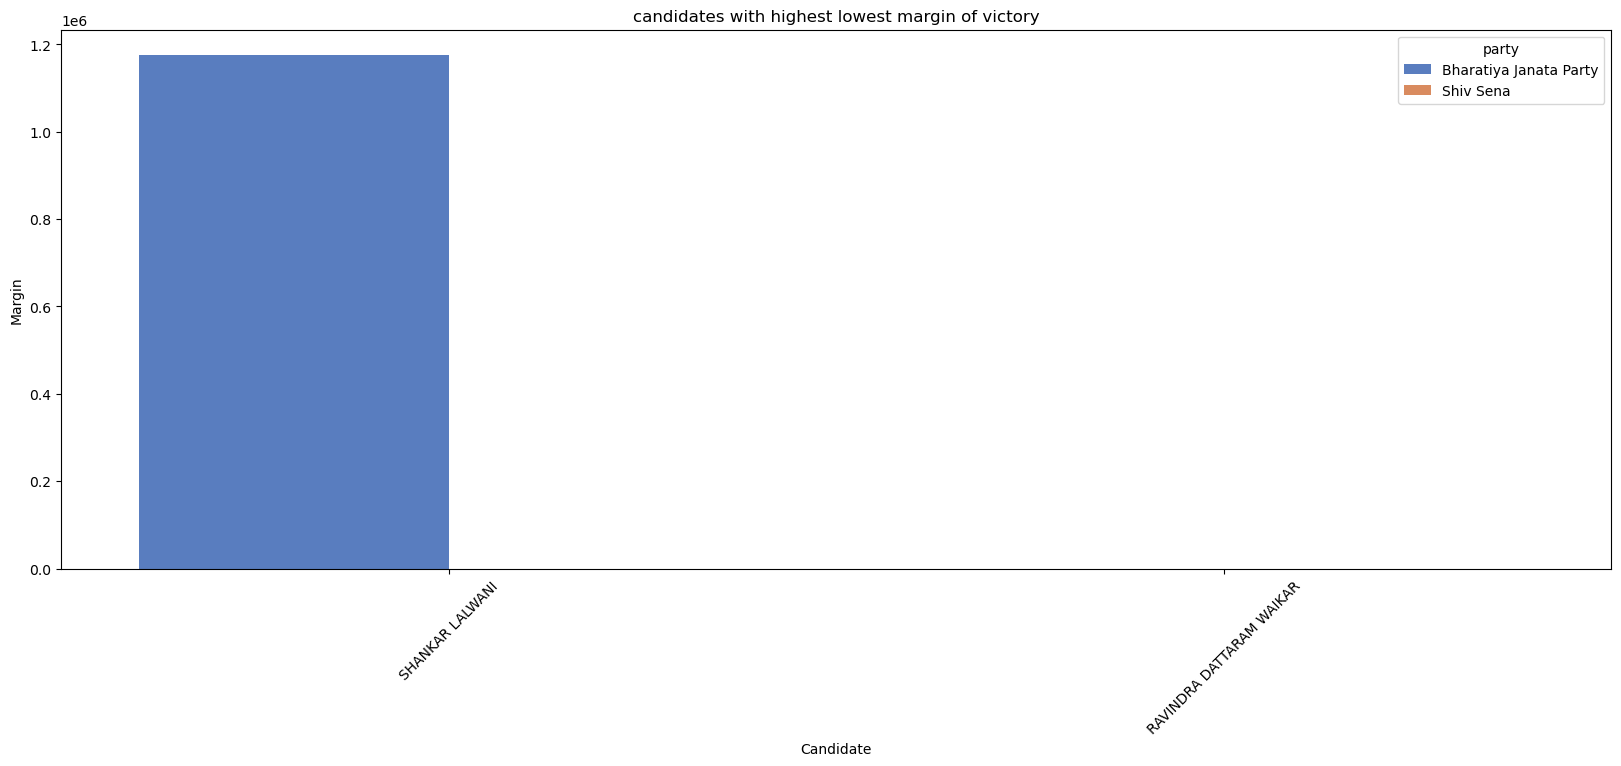

In [59]:
data_to_plot=pd.DataFrame({"Candidate":[highest_margin['Leading Candidate'],lowest_margin['Leading Candidate']],
                          "party":[highest_margin['Leading Party'],lowest_margin['Leading Party']],
                          "Margin":[highest_margin['Margin'],lowest_margin['Margin']]})
#plot the comparison
plt.figure(figsize=(20,7))
sns.barplot(data=data_to_plot,x='Candidate',y='Margin',hue='party',palette='muted')
plt.title('candidates with highest lowest margin of victory')
plt.xlabel("Candidate")
plt.ylabel('Margin')
plt.xticks(rotation=45)
plt.show()

In [60]:
#Shankar lalwani from bjp & ravindra dattaram waikar from shivsena got least votes

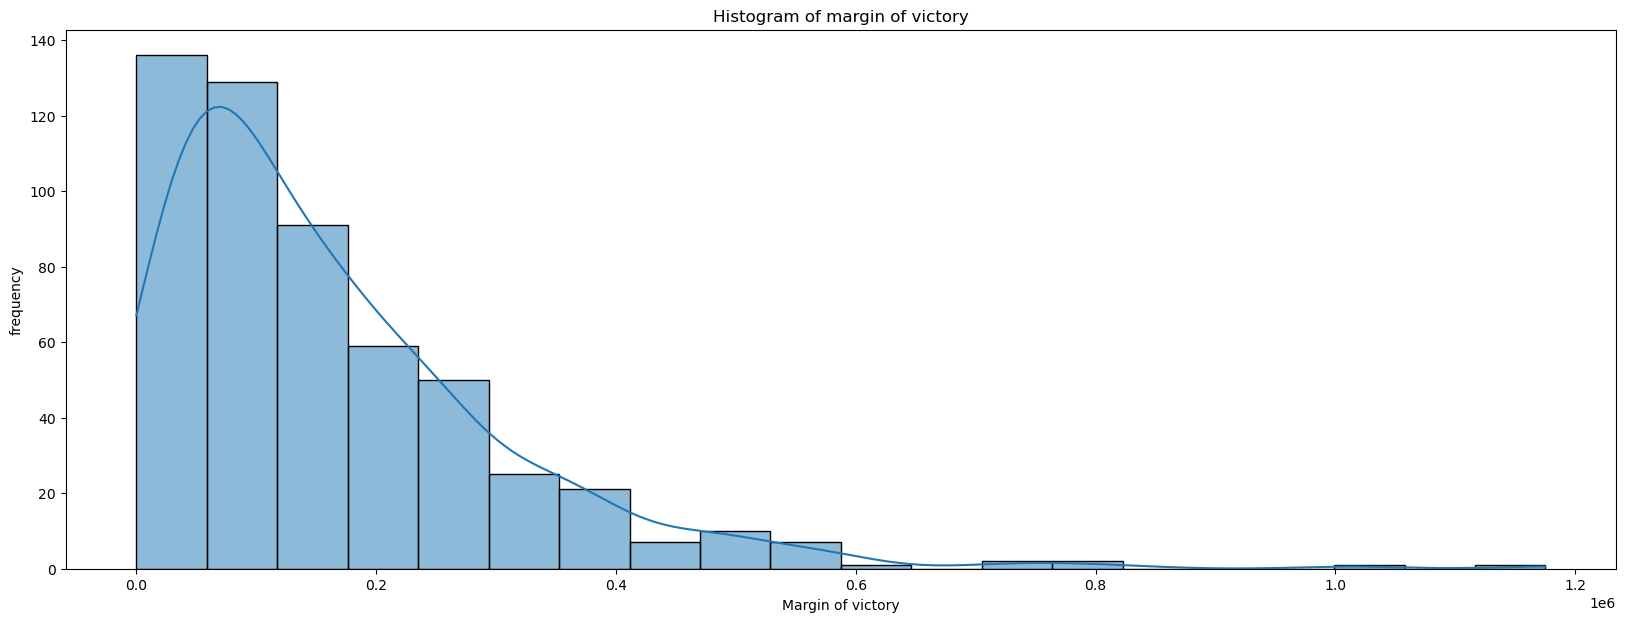

In [61]:
plt.figure(figsize=(20,7))
sns.histplot(df['Margin'],bins=20,kde=True)
plt.title('Histogram of margin of victory')
plt.xlabel("Margin of victory")
plt.ylabel('frequency')
plt.show()

In [62]:
#vote distribution by party

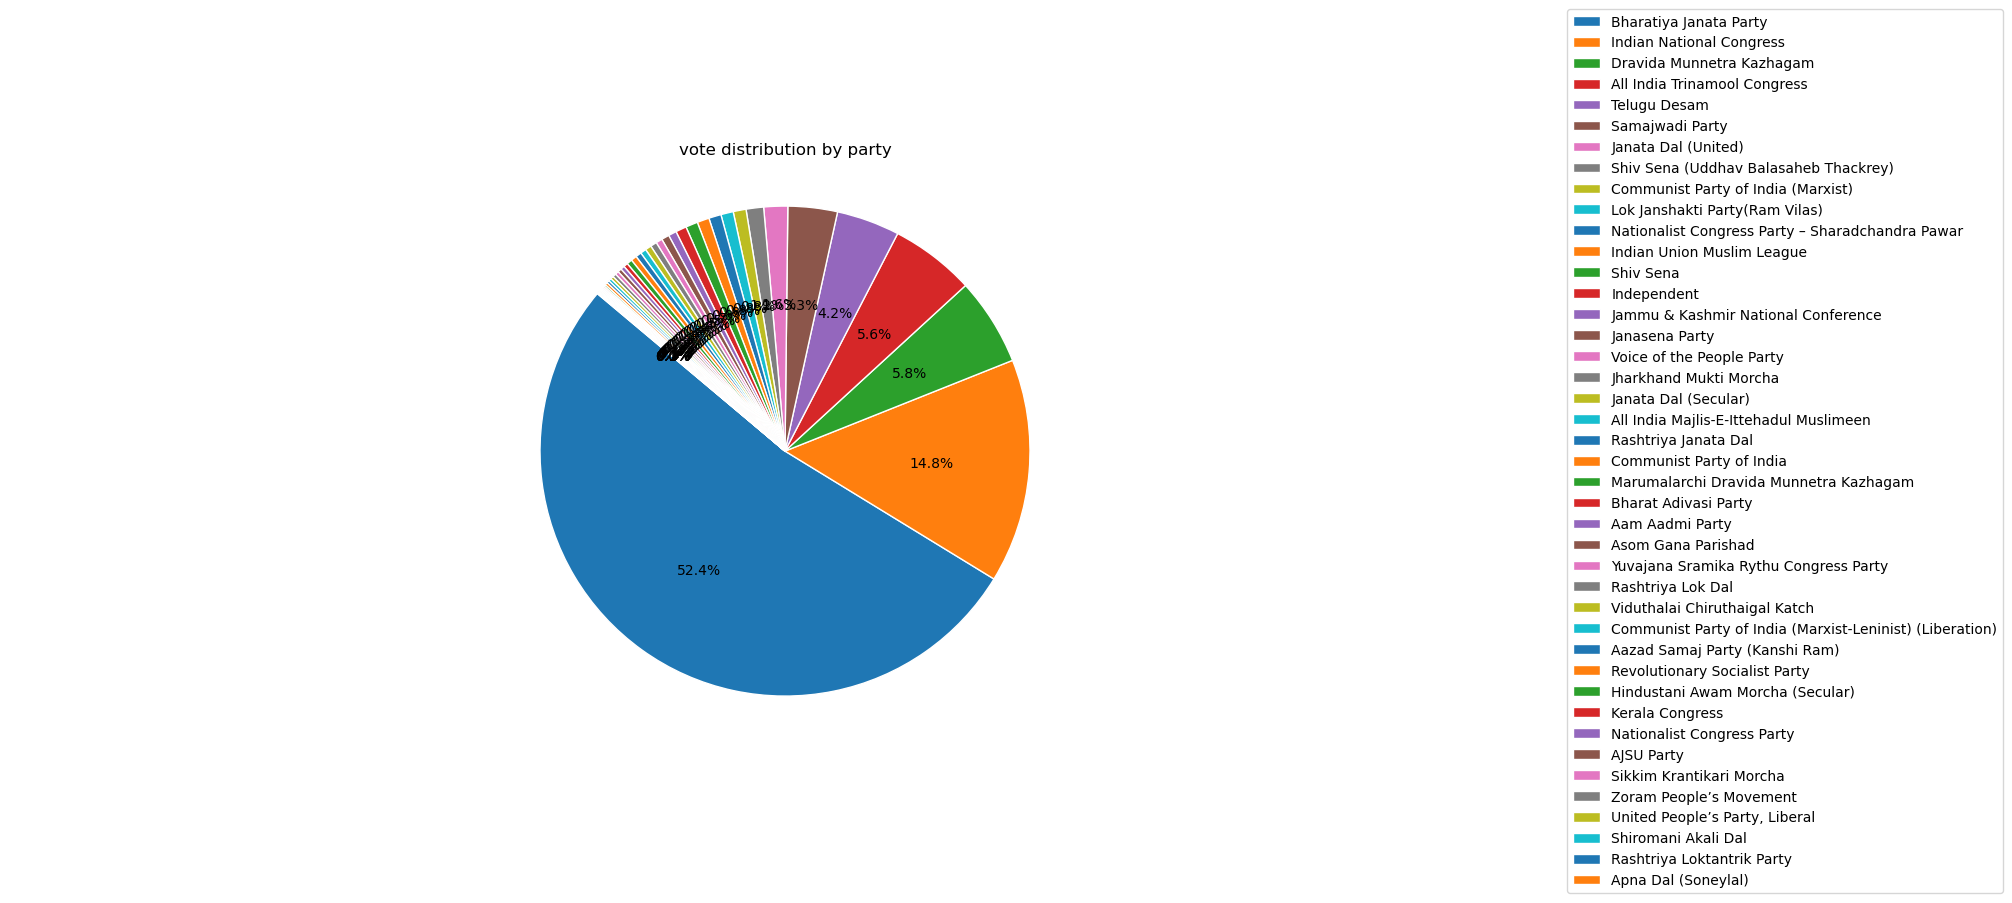

In [63]:
party_votes=df.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

plt.figure(figsize=(20,7))
wedges,texts,autotext=plt.pie(party_votes,labels=None,autopct='%1.1f%%',startangle=140,wedgeprops=dict(edgecolor='w'))
plt.title('vote distribution by party',pad=20)
plt.axis("equal")
plt.legend(labels=party_votes.index,loc='center left',bbox_to_anchor=(1,0.5),fontsize='medium')
plt.show()

In [64]:
#conclusion:bjp got 52.4% votes , INC got 14.8% votes

In [65]:
trailing_party_votes=df.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats=df['Trailing Party'].value_counts()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Indian National Congress'),
  Text(1, 0, 'Bharatiya Janata Party'),
  Text(2, 0, 'All India Anna Dravida Munnetra Kazhagam'),
  Text(3, 0, 'Yuvajana Sramika Rythu Congress Party'),
  Text(4, 0, 'Communist Party of India (Marxist)'),
  Text(5, 0, 'Samajwadi Party'),
  Text(6, 0, 'Biju Janata Dal'),
  Text(7, 0, 'Rashtriya Janata Dal'),
  Text(8, 0, 'Bahujan Samaj Party'),
  Text(9, 0, 'Aam Aadmi Party')])

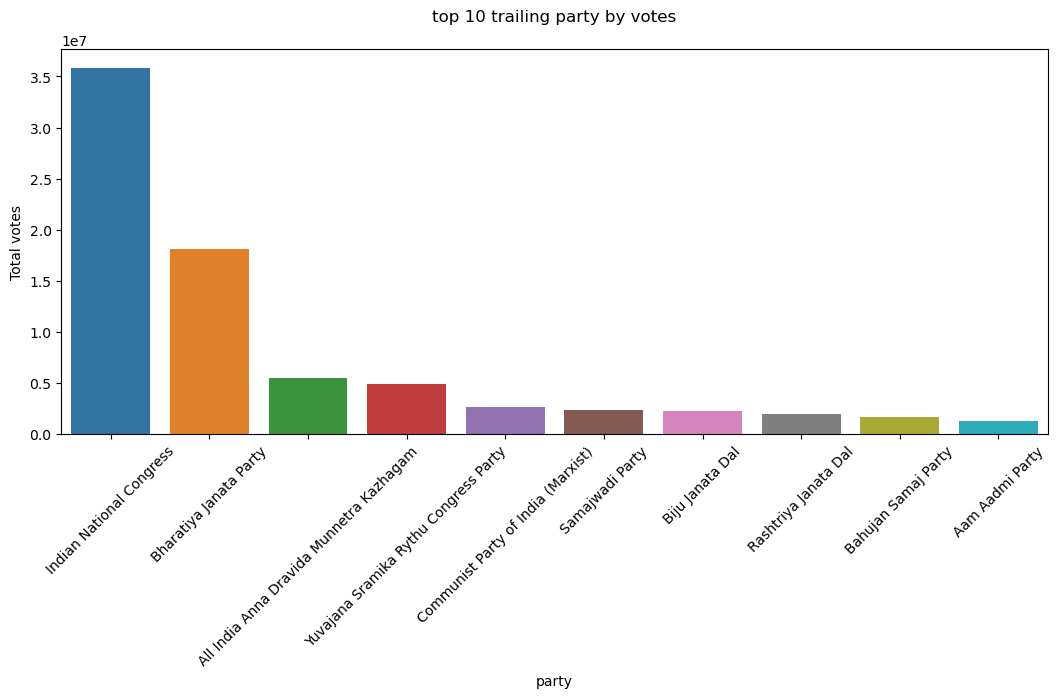

In [66]:

plt.figure(figsize=(28,5))

plt.subplot(1,2,1)
sns.barplot(x=trailing_party_votes.index[:10],y=trailing_party_votes.values[:10])
plt.title('top 10 trailing party by votes',pad=20)
plt.xlabel("party")
plt.ylabel('Total votes')
plt.xticks(rotation=45)

In [67]:
#conclusion:INC,BJP got least votes amany locations

In [68]:
#top10 trailing party by votes

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Indian National Congress'),
  Text(1, 0, 'Bharatiya Janata Party'),
  Text(2, 0, 'All India Anna Dravida Munnetra Kazhagam'),
  Text(3, 0, 'Samajwadi Party'),
  Text(4, 0, 'Biju Janata Dal'),
  Text(5, 0, 'Yuvajana Sramika Rythu Congress Party'),
  Text(6, 0, 'Rashtriya Janata Dal'),
  Text(7, 0, 'Communist Party of India (Marxist)'),
  Text(8, 0, 'All India Trinamool Congress'),
  Text(9, 0, 'Aam Aadmi Party')])

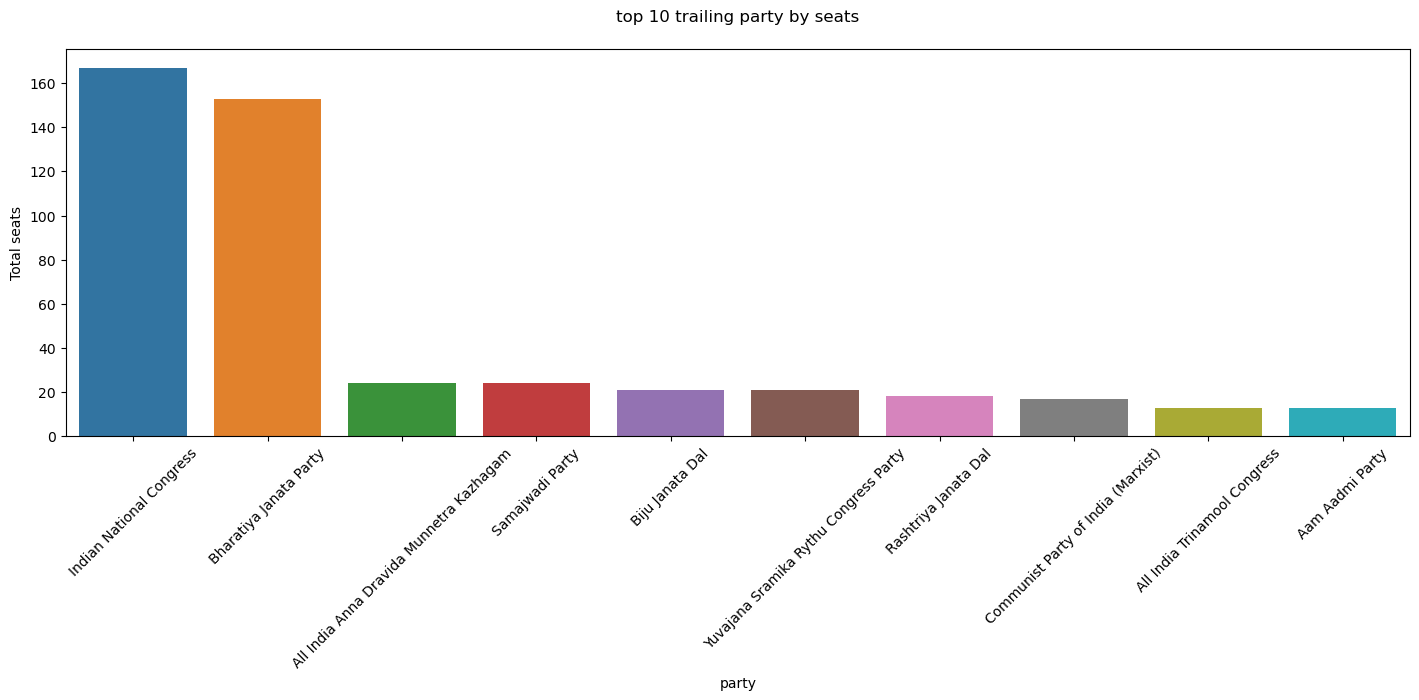

In [69]:

plt.figure(figsize=(28,5))

plt.subplot(1,2,2)
sns.barplot(x=trailing_party_seats.index[:10],y=trailing_party_seats.values[:10])
plt.title('top 10 trailing party by seats',pad=20)
plt.xlabel("party")
plt.ylabel('Total seats')
plt.tight_layout()
plt.xticks(rotation=45)

In [70]:
#conclusion:INC,BJP got least seats at many locations

# conclusions:

In [71]:
#1:BJP got max votes
#2:RG got votes from Rae Bareli,Wayanad. NM got max votes from Varanasi. AS got max votes from Gandhinagar
#3:bjp got 52.4% votes , INC got 14.8% votes
#4:INC,BJP got least votes at many locations
#5:INC,BJP got least seats at many locations

# Thankyou